# F1 Canadian Grand Prix June 2024 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv(r"D:\PYTON PROGRAMMING\PYTHON FILES\MATPLOTLIB\MATPLOTLIB PRACTICE\F1 RACE ANALYSIS PROJECTS\F1 Candian GP 2025\F1 CANADIAN GP.csv")

In [3]:
df.columns = df.columns.str.strip()
df.head()

,Sl no.,Driver Name,Team Name,Qualifying Lap Time,Grid Position,L1,L2,L3,L4,L5,...,L61,L62,L63,L64,L65,L66,L67,L68,L69,L70
0,1,George Russell,Mercedes,01:11.0,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,Max Verstappen,Red Bull Racing Honda RBPT,01:11.1,2,2,2,2,2,2,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3,Oscar Piastri,McLaren Mercedes,01:11.1,3,4,4,4,4,4,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,4,Kimi Antonelli,Mercedes,01:11.4,4,3,3,3,3,3,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,5,Lewis Hamilton,Ferrari,01:11.5,5,5,5,5,5,5,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0,6.0


In [50]:
grid_position_driver = df['Driver Name'].to_list()
grid_no = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [52]:
team_colors = {
    'Mercedes': '#00D2BE',
    'Red Bull Racing Honda RBPT': '#1E41FF',
    'Ferrari': '#DC0000',
    'McLaren Mercedes': '#FF8000',
    'Aston Martin Aramco Mercedes': '#006F62',
    'Alpine Renault': '#0090FF',
    'Williams Mercedes': '#005AFF',
    'Kick Sauber Ferrari': '#52E252',
    'Haas Ferrari': '#B6BABD',
    'Racing Bulls Honda RBPT': '#6692FF'
}

driver_teams = df.set_index('Driver Name')['Team  Name'].str.strip().to_dict()

In [ ]:
lap_data = {}

for _, row in df.iterrows():
    driver = row['Driver Name'].strip()  # clean name
    laps = row.iloc[4:].dropna().astype(int).tolist()  # get lap positions
    lap_data[driver] = laps

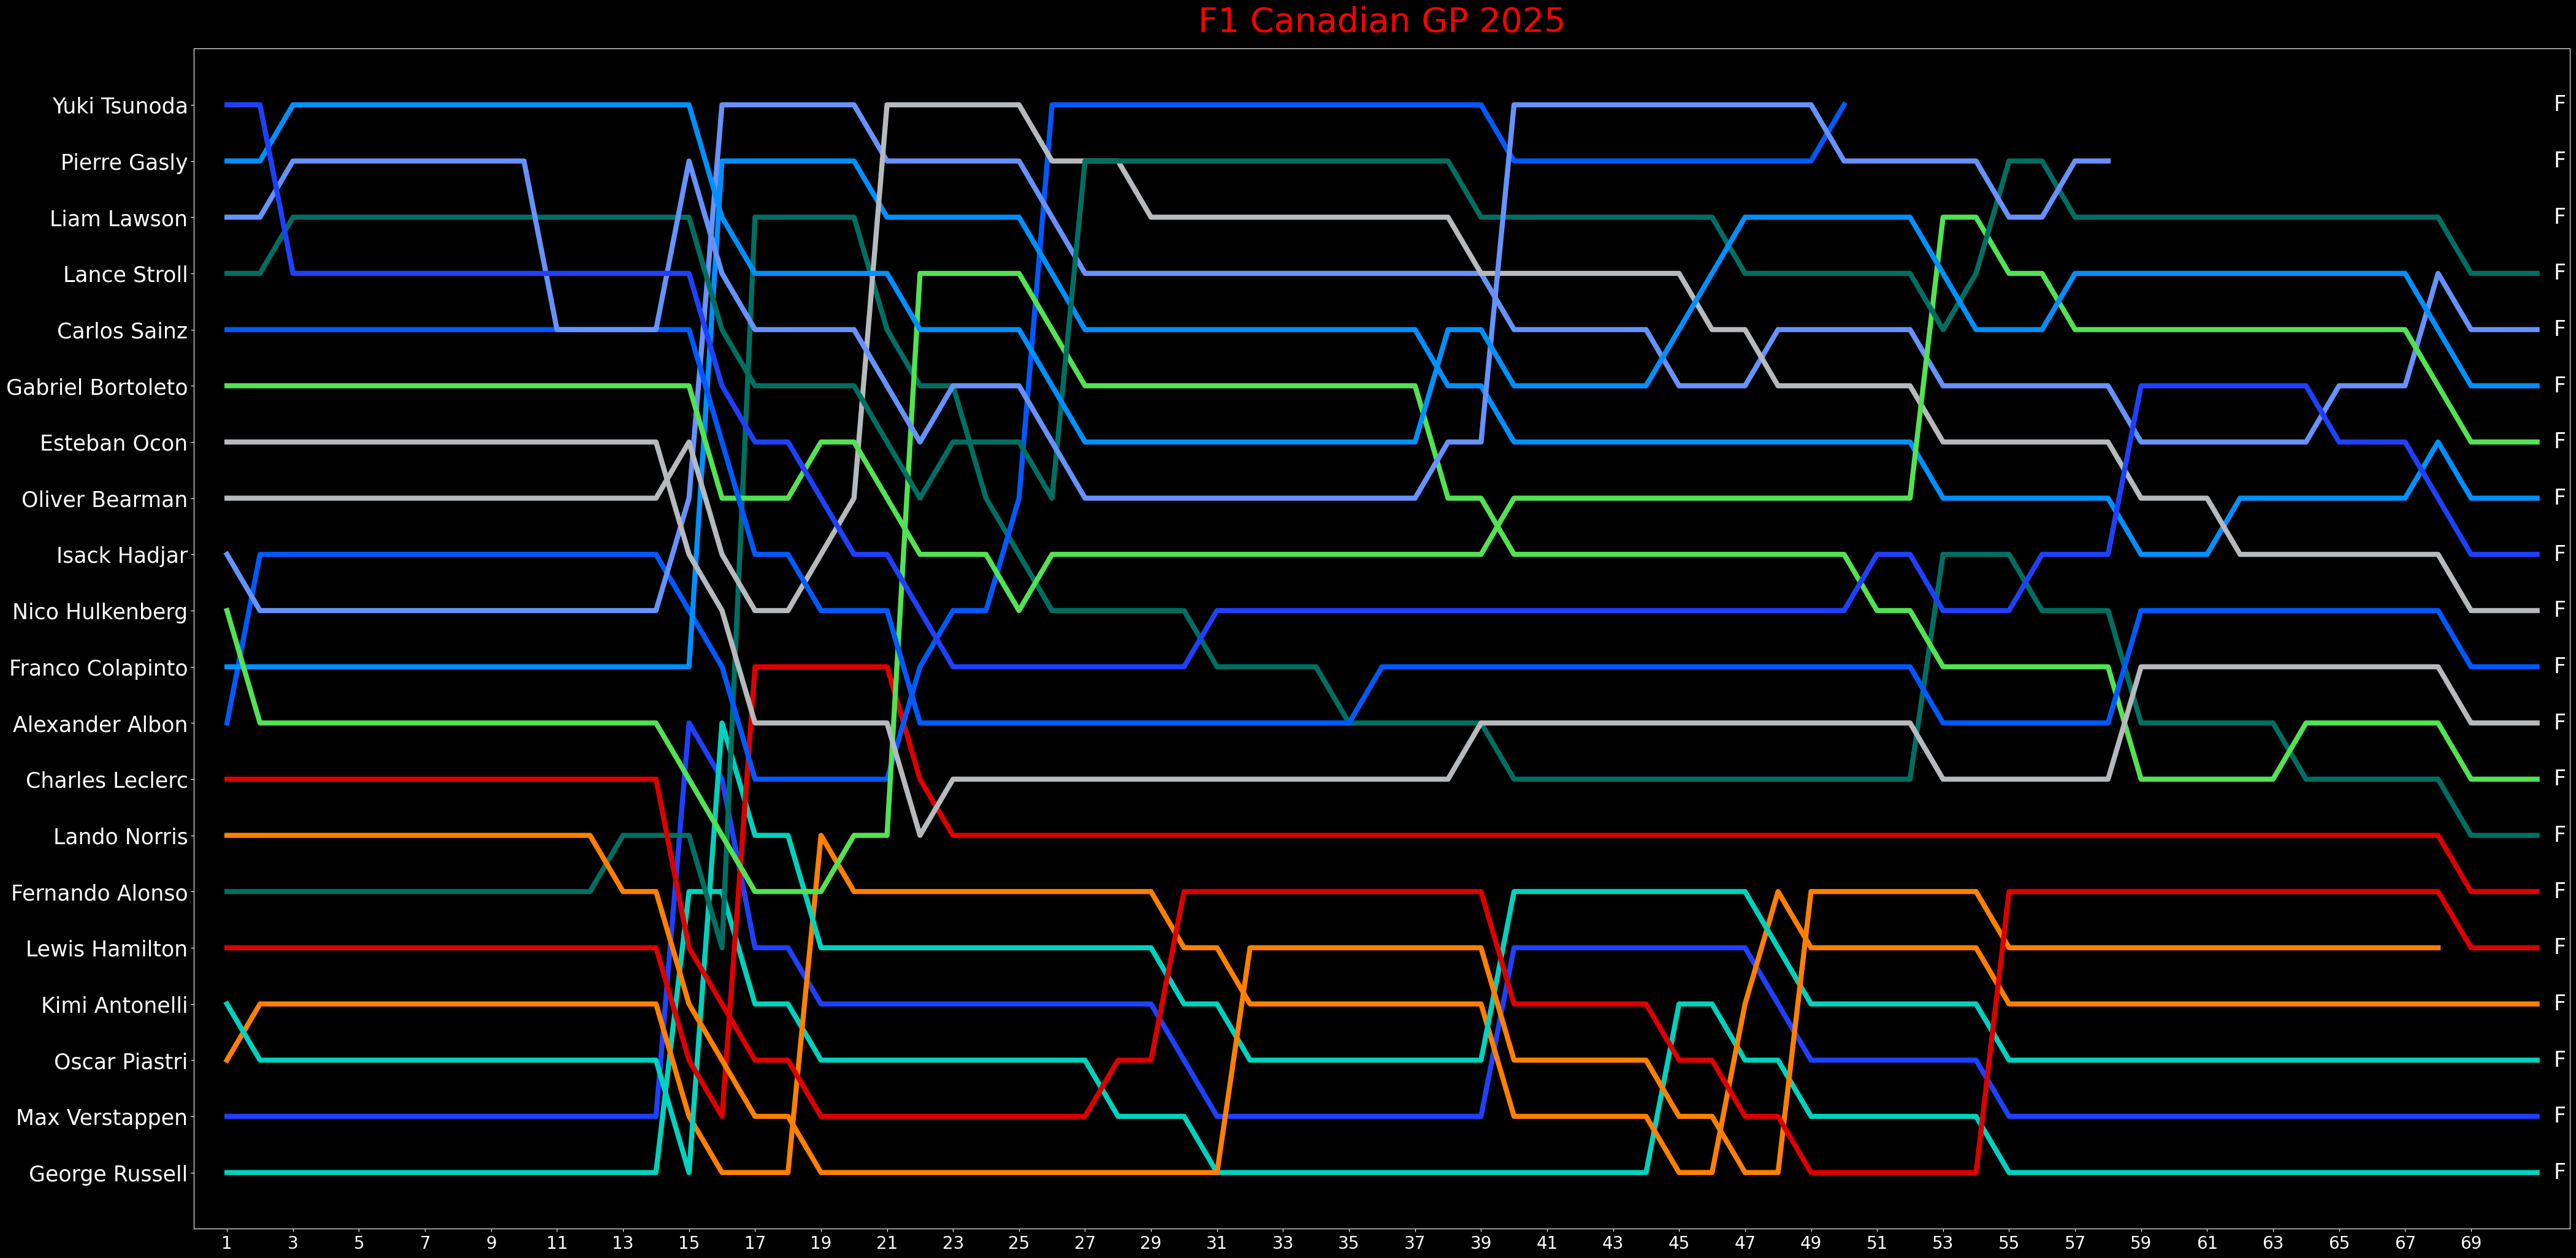

In [55]:
fig, ax = plt.subplots(figsize=(50, 25))

# Set the background color of the entire figure canvas to black.
fig.patch.set_facecolor('black')    # .patch is the rectangle that is the background of the figure.
                                  
# Set plot (axes) background color to black
ax.set_facecolor('black')

# Set axis labels and tick color to white
ax.tick_params(colors='white')         # .tick_params(...)	Customizes tick appearance
ax.xaxis.label.set_color('white')      # X-axis label color
ax.yaxis.label.set_color('white')      # ax, the plot area (Axes object)
ax.title.set_color('white')

# Make the axis color white
for spine in ax.spines.values():       # It changes the color of all four border lines (called spines) around your plot to white.
    spine.set_color('white')

# Plots the graph of lap times
for driver, laps in lap_data.items():
    team = driver_teams[driver]
    color = team_colors.get(team, 'white')  # default to white if team not found
    ax.plot(range(1, len(laps)+1), laps, linewidth=6, color=color, label=driver)

    
ax.set_xlim(0, 72)
ax.set_ylim(0, 21)

plt.xticks(range(1,71,2), fontsize = 20)
plt.yticks(range(1,21), fontsize = 20)

ax.set_yticklabels(grid_position_driver, fontsize = 25)

for grid in grid_no:
    ax.text(71.5, grid, 'F', fontsize=25, color='white',ha='left', va='center')

plt.title('F1 Canadian GP 2025', fontsize = 40, color = 'r', pad=20)
plt.show()

In [ ]:
y_verstappen = df_check['Verstappen'].to_list()
y_norris = df_check['Norris'].to_list()
y_russell = df_check['Russell'].to_list()
y_hamilton = df_check['Hamilton'].to_list()
y_piastri = df_check['Piastri'].to_list()
y_alonso = df_check['Alonso'].to_list()
y_stroll = df_check['Stroll'].to_list()
y_ricciardo = df_check['Ricciardo'].to_list()
y_gasly = df_check['Gasly'].to_list()
y_ocon = df_check['Ocon'].to_list()
y_hulkenberg = df_check['Hulkenberg'].to_list()
y_magnussen = df_check['Magnussen'].to_list()
y_bottas = df_check['Bottas'].to_list()
y_tsunoda = df_check['Tsunoda'].to_list()
y_zhou = df_check['Zhou'].to_list()
y_sainz = df_check['Sainz'].to_list()
y_albon = df_check['Albon'].to_list()
y_perez = df_check['Perez'].to_list()
y_leclerc = df_check['Leclerc'].to_list()
y_sargeant = df_check['Sargeant'].to_list()

x = df_check['Lap'].to_list()

drivers_order = [
    'Ocon', 'Zhou',  'Hulkenberg','Bottas',
    'Perez', 'Gasly', 'Magnussen', 'Sargeant','Sainz', 'Leclerc', 
    'Albon', 'Stroll', 'Tsunoda',  'Hamilton', 'Alonso', 'Ricciardo',
    'Piastri', 'Norris', 'Verstappen', 'Russell', " "
]

plt.figure(figsize=(35,20),facecolor='black')

plt.plot(
    x,y_verstappen,
    'blue',
    linewidth = 5
)

plt.plot(
    x, y_norris,
    color = 'orange',
    linewidth = 5
)

plt.plot(
    x,y_russell,
    linewidth = 5,
    color = "#03BFB5"
)

plt.plot(
    x,y_piastri,
    linewidth = 5,
    color = 'orange'
)

plt.plot(
    x,y_hamilton,
    linewidth = 5,
    color = "#03BFB5"
)

plt.plot(
    x,y_alonso,
    linewidth = 5,
    color = "#02603C"
)

plt.plot(
    x,y_stroll,
    linewidth = 5,
    color = "#02603C"
)

plt.plot(
    x,y_ricciardo,
    linewidth = 5,
    color = "#3C00FF"
)

plt.plot(
    x,y_gasly,
    linewidth = 5,
    color = "#E179C7"
)

plt.plot(
    x,y_ocon,
    linewidth = 5,
    color = "#DE423D"
)
plt.gca().invert_yaxis()

ax = plt.gca()
ax.tick_params(axis='both', colors='white')     # Change axis coordinate color
ax.set_facecolor('black')       # # Change plot area color

for spine in ax.spines.values():
    spine.set_color('red')  # Change axis line color
    spine.set_linewidth(3)
    
plt.yticks(ticks=range(0, 21), fontsize = 25, labels=drivers_order[::-1])
plt.xticks(ticks=range(0, max(x)+1, 2), fontsize = 25)

plt.title("Canadian GP 2024",color='white', fontsize=35, pad=20)
plt.xlabel("Laps",fontsize=28, color='white',labelpad=20)
plt.ylabel("Position", fontsize=28, color='white', labelpad=20)

plt.xlim(left=0)
plt.ylim(21,0)

plt.legend(fontsize=20)
plt.tight_layout()
plt.show()